# BI-PST Domácí úkol
- Igor Tsaregorodtsev
- Maxim Sachok
- Jan Bittner

---

## Parametry úkolu
Reprezentantem úlohy byl zvolen Igor Tsaregorodtsev. Spočítejme příslušné parametry:

    K = 11 (11.08.1997)
    L = 14 (Tsaregorodtsev)
    M = ((K+L)*47) mod 11 + 1 = 1175 mod 11 + 1 = 9 + 1 = 10
    
Podle tabulky nám vyjde úloha "ex0221 - váha dle přežití vrabců".

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats.distributions import uniform, expon, norm

##  Načtení a analýza dat

Načtena z knihovny "Sleuth2" data byla exportována do CSV souboru, který se snadno parsuje pomocí knihovny "pandas".

Každý záznam souboru se skládá z hmotnosti dospělého vrabce v gramech a statusu, který značí, zdali vrabec v zimní bouři zahynul nebo přežil.

Pozorovaná data byla rozdělena na dvě skupiny: vrabci se statusem "survived" a vrabci se statusem "perished".

In [2]:
my_data = pd.read_csv('data.csv', sep=";").values

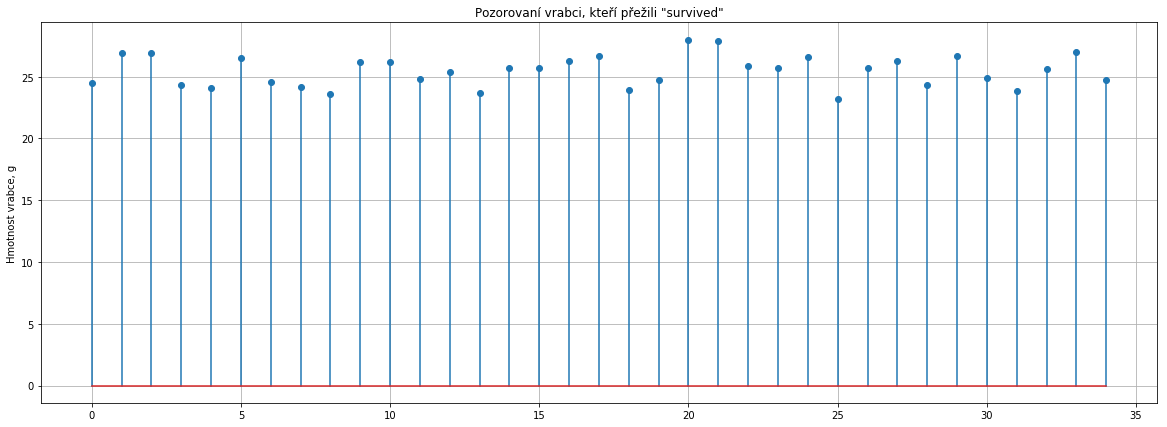

[24.5        26.89999962 26.89999962 24.29999924 24.10000038 26.5
 24.60000038 24.20000076 23.60000038 26.20000076 26.20000076 24.79999924
 25.39999962 23.70000076 25.70000076 25.70000076 26.29999924 26.70000076
 23.89999962 24.70000076 28.         27.89999962 25.89999962 25.70000076
 26.60000038 23.20000076 25.70000076 26.29999924 24.29999924 26.70000076
 24.89999962 23.79999924 25.60000038 27.         24.70000076]


Analýza hmotnosti "survived" vrabců:

   celkový počet = 35,

   střední hodnota = 25.463,

   rozptyl = 1.539,

   medián = 25.700,

   min = 23.200,

   max = 28.000.


In [3]:
data_survived = np.array([value[0] for value in my_data if value[1] == 'survived'])

plt.figure(figsize=(20, 7))
plt.stem(data_survived)
plt.grid(True)
plt.title('Pozorovaní vrabci, kteří přežili "survived"')
plt.ylabel('Hmotnost vrabce, g')
plt.show()

print(data_survived)
print("\n")

survived_cnt = data_survived.size
survived_EX = np.average(data_survived)
survived_var = np.var(data_survived)
survived_median = np.median(data_survived)
survived_min = np.min(data_survived)
survived_max = np.max(data_survived)

print('Analýza hmotnosti "survived" vrabců:\n')
print(f'   celkový počet = {survived_cnt:d},\n')
print(f'   střední hodnota = {survived_EX:.3f},\n')
print(f'   rozptyl = {survived_var:.3f},\n')
print(f'   medián = {survived_median:.3f},\n')
print(f'   min = {survived_min:.3f},\n')
print(f'   max = {survived_max:.3f}.')

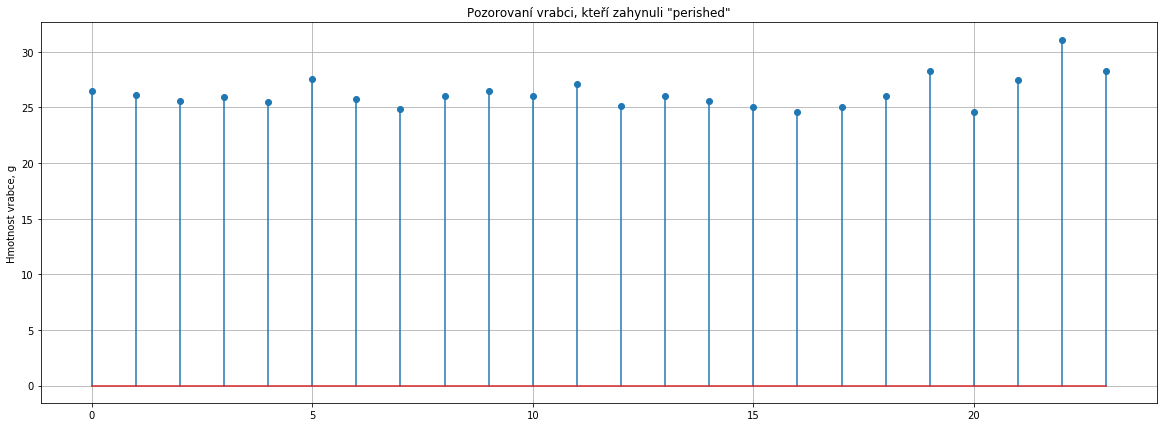

[26.5        26.10000038 25.60000038 25.89999962 25.5        27.60000038
 25.79999924 24.89999962 26.         26.5        26.         27.10000038
 25.10000038 26.         25.60000038 25.         24.60000038 25.
 26.         28.29999924 24.60000038 27.5        31.10000038 28.29999924]


Analýza hmotnosti "perished" vrabců:

   celkový počet = 24,

   střední hodnota = 26.275,

   rozptyl = 2.078,

   medián = 26.000,

   min = 24.600,

   max = 31.100.


In [4]:
data_perished = np.array([value[0] for value in my_data if value[1] == 'perished'])

plt.figure(figsize=(20, 7))
plt.stem(data_perished)
plt.grid(True)
plt.title('Pozorovaní vrabci, kteří zahynuli "perished"')
plt.ylabel('Hmotnost vrabce, g')
plt.show()

print(data_perished)
print("\n")

perished_cnt = data_perished.size
perished_EX = np.average(data_perished)
perished_var = np.var(data_perished)
perished_median = np.median(data_perished)
perished_min = np.min(data_perished)
perished_max = np.max(data_perished)

print('Analýza hmotnosti "perished" vrabců:\n') 
print(f'   celkový počet = {perished_cnt:d},\n')
print(f'   střední hodnota = {perished_EX:.3f},\n')
print(f'   rozptyl = {perished_var:.3f},\n')
print(f'   medián = {perished_median:.3f},\n')
print(f'   min = {perished_min:.3f},\n')
print(f'   max = {perished_max:.3f}.')

---

## Zkoumání "survived" vrabců

Z předchozí analýzy víme, že v této skupině neexistuje žádný vrabec s hmotností menší než 23.2 a větší než 28, takže budeme analyzovat data na intervalu [23, 28].

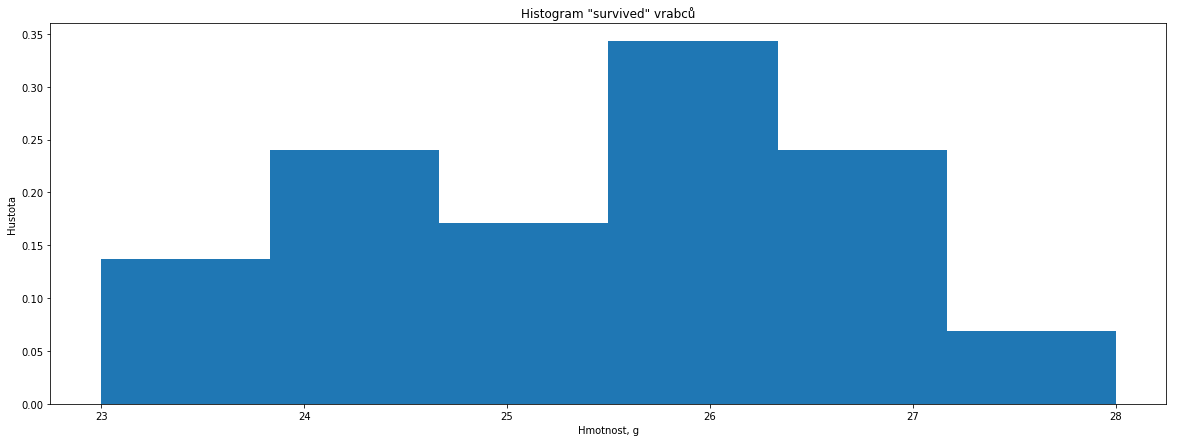

In [5]:
#Určíme interval, počet přehrádek a přehrádky
ox_interval = np.linspace(int(survived_min), survived_max)

#Optimální počet přehrádek byl zvolen takový:
breaks = 6
bins_survived = np.linspace(round(survived_min), survived_max, breaks + 1)

#Výsledný histogram
plt.figure(figsize=(20,7))
plt.title('Histogram "survived" vrabců')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')
plt.hist(data_survived, bins_survived, density=True)

plt.show()

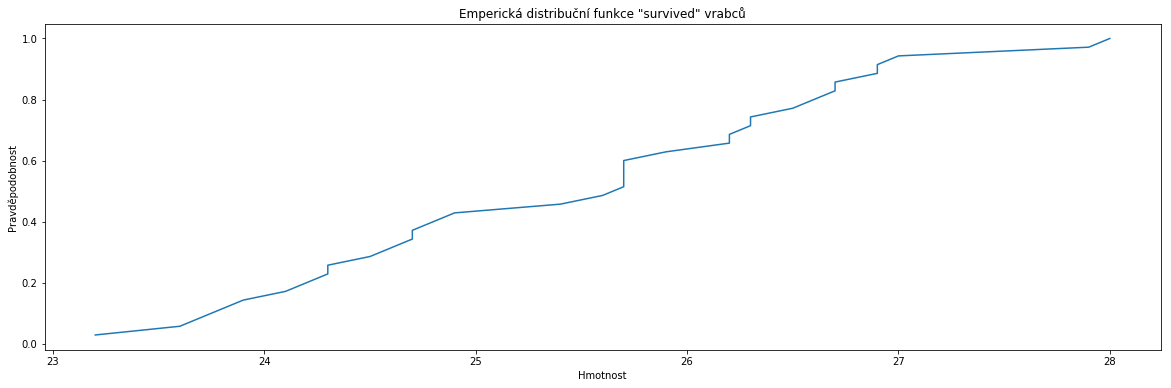

In [6]:
#Najdeme empirickou distribuční funkci
ecdf_survived = ECDF(data_survived)

plt.figure(figsize=(20,6))
plt.title('Emperická distribuční funkce "survived" vrabců')
plt.xlabel('Hmotnost')
plt.ylabel('Pravděpodobnost')
plt.plot(ecdf_survived.x, ecdf_survived.y)

plt.show()

Pozorováním histogramu a emperické distribuční funkce "survived" vrabců předpokládáme, že se jedná o normální rozdělení, pro které je hustota ve tvaru

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \mathrm{e}^{-\frac{{(x-\mu)}^2}{2\sigma^2}}
$$

a je distribuční funkce ve tvaru

$$
F(x) = \int_{-\infty}^x \frac{1}{\sigma\sqrt{2\pi}} \mathrm{e}^{-\frac{{(t-\mu)}^2}{2\sigma^2}} \;\mathrm{d}t
$$

Nicméně, porovnějme histogram "survived" vrabců s histogramy náhodně vygenerovaných známých rozdělení (Normální, Exponenciální, Rovnoměrné), abychom mohli ověřit náš předpoklad. Odhad parametrů těchto rozdělení uděláme ze zkoumaných dat.

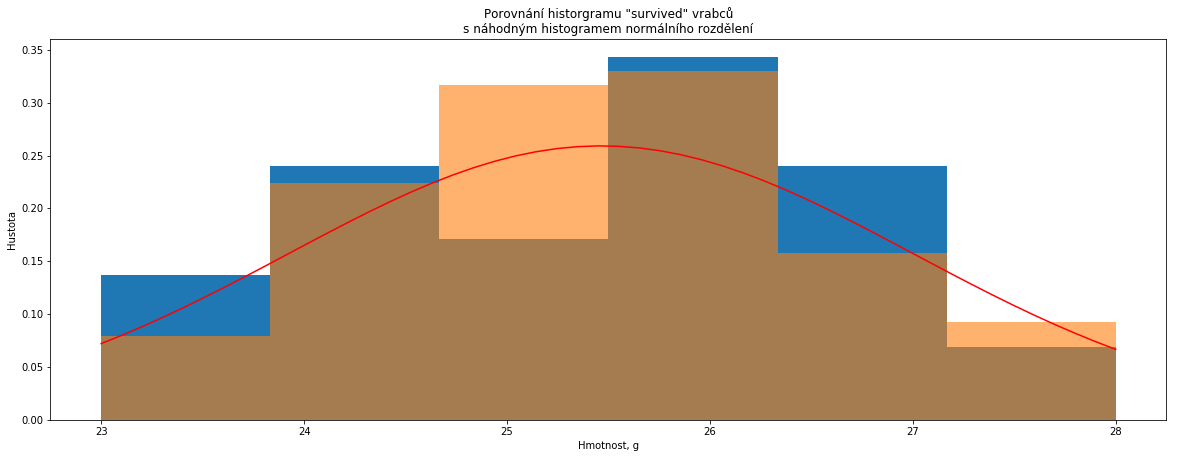

In [7]:
#Porovnání s normálním rozdělěním
plt.figure(figsize=(20,7))
plt.title('Porovnání historgramu "survived" vrabců\ns náhodným histogramem normálního rozdělení')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')

#Histogram naších dat
plt.hist(data_survived, bins_survived, density=True)

#Z naších dat odhadujeme parametry normálního rozdělení
mu = survived_EX
sigma = survived_var

#Vygenerujeme si 100 náhodných hodnot z normálního rozdělění 
#a dáme je do histogramu se stejným počtem přehrádek
random_normal_values = np.random.normal(mu, sigma, 100)
plt.hist(random_normal_values, bins_survived, alpha=0.6, density=True)

#A ještě si pro přehlednost nakreslíme graf hustoty normálního rozdělení
plt.plot(ox_interval, norm.pdf(ox_interval, loc=mu, scale=sigma), color='r')

plt.show()

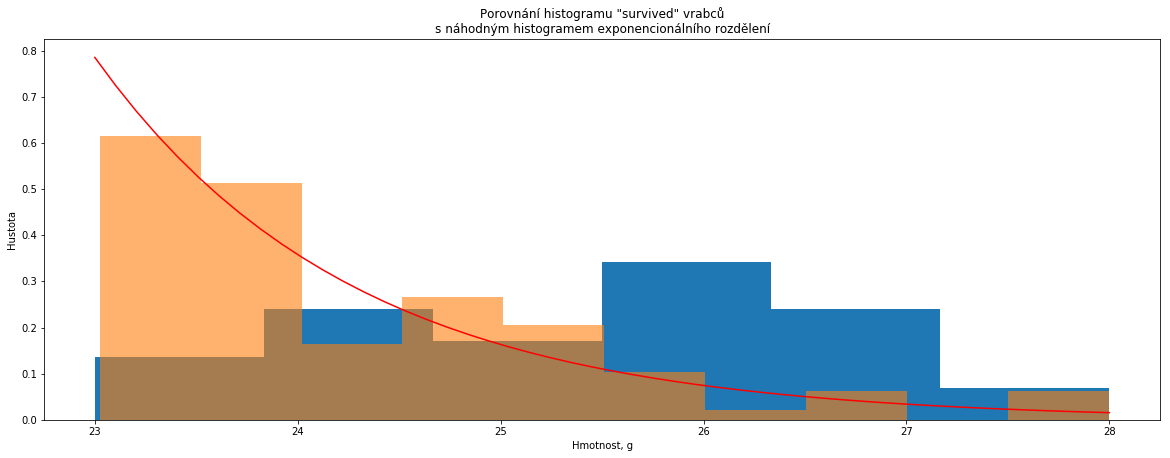

In [8]:
#Porovnání s exponenciálním rozdělěním
plt.figure(figsize=(20,7))
plt.title('Porovnání histogramu "survived" vrabců\ns náhodným histogramem exponencionálního rozdělení')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')

#Histogram naších dat
plt.hist(data_survived, bins_survived, density=True)

#Z naších dat odhadujeme parametry exponenciálního rozdělení
lmb = 1 / survived_EX
# ++OKOMENTOVAT ZMENU PARAMETRU ~ TRANSFORMACE
mu = 1 / lmb * 0.05

#Vygenerujeme si 100 náhodných hodnot z exponenciálního rozdělění 
#a dáme je do histogramu se stejným počtem přehrádek.
#Jelikož hodnoty z exponencíalního rozdělení se generujou na intervalu [0, +inf],
#musíme je posunotut, aby ležely od bodu round(survived_min), totiž na intervalu [23, +inf] 
random_exponential_values = np.random.exponential(mu, 100) + round(survived_min)
#Protože nechceme zobrazovat hodonty větší než survived_max, ořezáme je
al = []
for i in random_exponential_values:
    if i <= survived_max: al.append(i)
#Výsledné hodnoty leží na intervalu [round(survived_min), survived_max]
plt.hist(al, alpha=0.6, density=True)

#A ještě si pro přehlednost nakreslíme graf hustoty exponenciálního rozdělení
plt.plot(ox_interval, expon.pdf(ox_interval, scale=mu, loc=round(survived_min)), color='r')

plt.show()

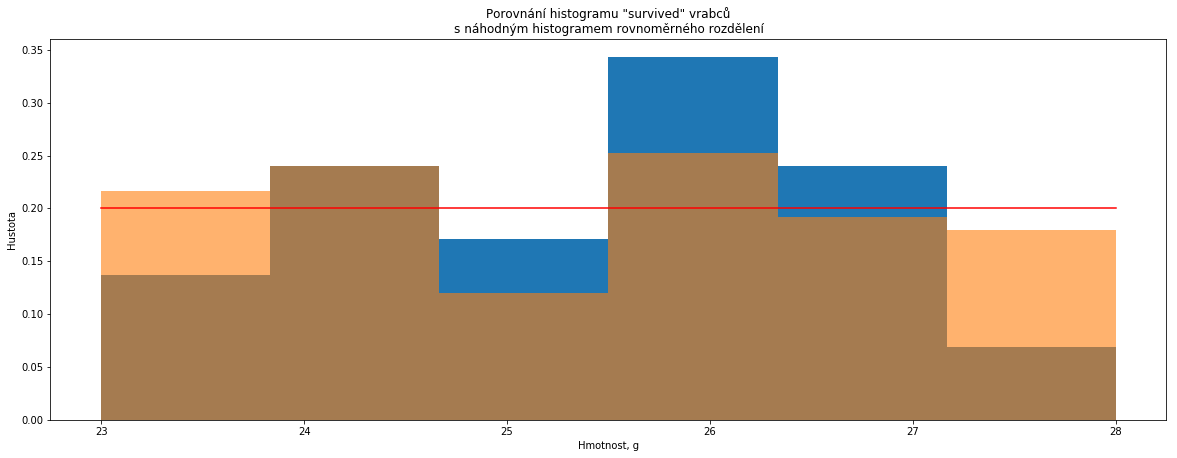

In [9]:
#Porovnání s rovnoměrným rozdělěním
plt.figure(figsize=(20,7))
plt.title('Porovnání histogramu "survived" vrabců\ns náhodným histogramem rovnoměrného rozdělení')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')

#Histogram naších dat
plt.hist(data_survived, bins_survived, density=True)

#Z naších dat odhadujeme parametry rovnoměrného rozdělení
a = round(survived_min)
b = survived_max

#Vygenerujeme si 100 náhodných hodnot z rovnoměrného rozdělění 
#a dáme je do histogramu se stejným počtem přehrádek
random_uniform_values = np.random.uniform(a, b, 100)
plt.hist(random_uniform_values, bins_survived, alpha=0.6, density=True)

#A ještě si pro přehlednost nakreslíme graf hustoty rovnoměrného rozdělení
plt.plot(ox_interval, uniform.pdf(ox_interval, loc=a, scale=(b - a)), color='r')

plt.show()

Jak vidíme, histogram "survived" vrabců nejlépe odpovídá normálnímu rozdělení. Předpoklad byl splněn.

## Zkoumání "perished" vrabců
Z předchozí analýzy víme, že v této skupině neexistuje žádný vrabec s hmotností menší než 24.6 a větší než 31.1, takže budeme analyzovat data na intervalu [24, 32].

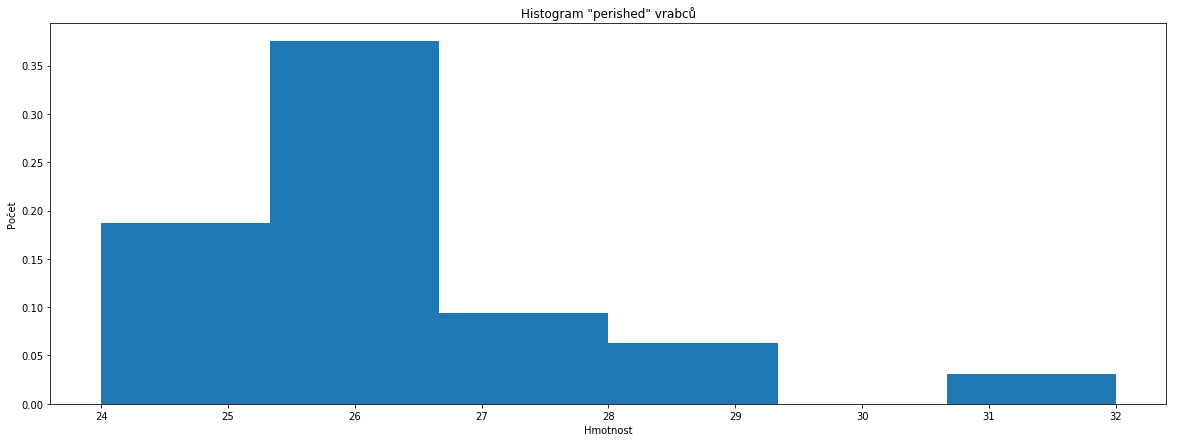

In [10]:
#Určíme interval, počet přehrádek a přehrádky
ox_interval = np.linspace(round(perished_min) - 1, round(perished_max) + 1)

#Optimální počet přehrádek byl zvolen takový:
breaks = 6
bins_perished = np.linspace(round(perished_min) - 1, round(perished_max) + 1, breaks + 1)

#Výsledný histogram
plt.figure(figsize=(20,7))
plt.title('Histogram "perished" vrabců')
plt.xlabel('Hmotnost')
plt.ylabel('Počet')
plt.hist(data_perished, bins_perished, density=True)

plt.show()

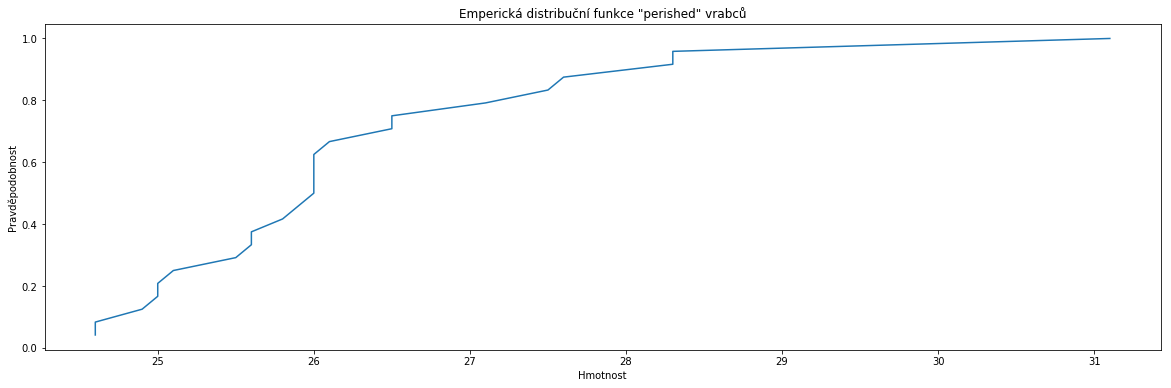

In [11]:
#Najdeme empirickou distribuční funkci
ecdf_perished = ECDF(data_perished)

plt.figure(figsize=(20,6))
plt.title('Emperická distribuční funkce "perished" vrabců')
plt.xlabel('Hmotnost')
plt.ylabel('Pravděpodobnost')

plt.plot(ecdf_perished.x, ecdf_perished.y)

plt.show()

Pozorováním histogramu a emperické distribuční funkce "perished" vrabců předpokládáme, že se jedná o exponenciální rozdělení, pro které je hustota ve tvaru:

$$
f_{X}(x) = \begin{cases}
\lambda e^{-\lambda x} & x > 0, \\
0 & x \leq 0.
\end{cases}
$$

a distribuční funkce je:

$$
F(x) = \begin{cases}
1-e^{-\lambda x} & x > 0, \\
0 & x \leq 0.
\end{cases}
$$

Nicméně, porovnějme histogram "perished" vrabců s histogramy náhodně vygenerovaných známých rozdělení (Normální, Exponenciální, Rovnoměrné), abychom mohli ověřit náš předpoklad. Odhad parametrů těchto rozdělení uděláme ze zkoumaných dat.

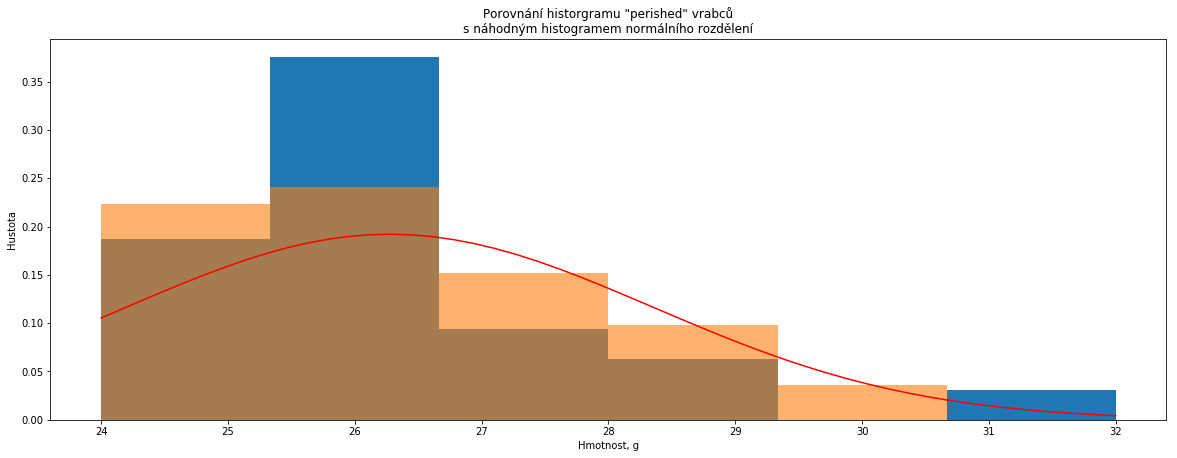

In [12]:
#Porovnání s normálním rozdělěním
plt.figure(figsize=(20,7))
plt.title('Porovnání historgramu "perished" vrabců\ns náhodným histogramem normálního rozdělení')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')

#Histogram naších dat
plt.hist(data_perished, bins_perished, density=True)

#Z naších dat odhadujeme parametry normálního rozdělení
mu = perished_EX
sigma = perished_var

#Vygenerujeme si 100 náhodných hodnot z normálního rozdělění 
#a dáme je do histogramu se stejným počtem přehrádek
random_normal_values = np.random.normal(mu, sigma, 100)
plt.hist(random_normal_values, bins_perished, alpha=0.6, density=True)

#A ještě si pro přehlednost nakreslíme graf hustoty normálního rozdělení
plt.plot(ox_interval, norm.pdf(ox_interval, loc=mu, scale=sigma), color='r')

plt.show()

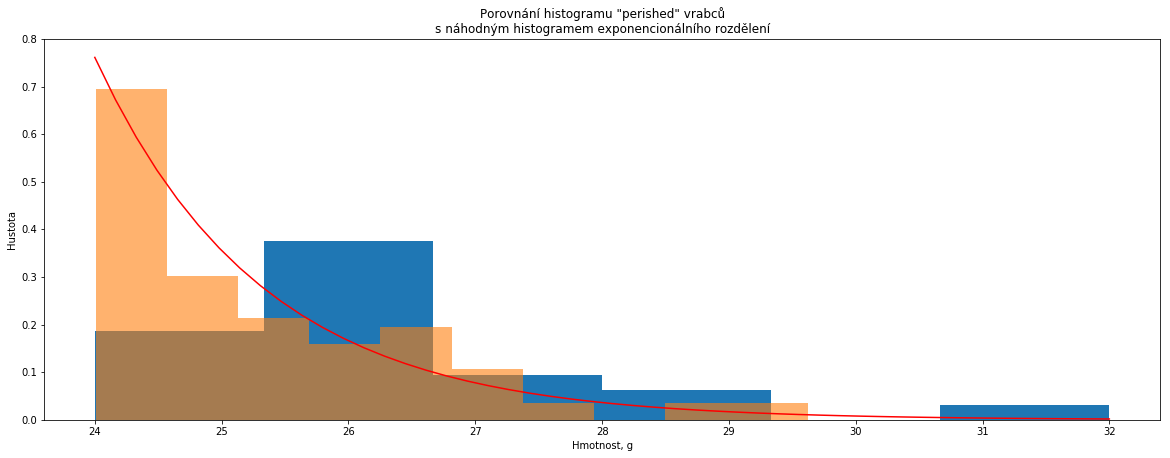

In [13]:
#Porovnání s exponenciálním rozdělěním
plt.figure(figsize=(20,7))
plt.title('Porovnání histogramu "perished" vrabců\ns náhodným histogramem exponencionálního rozdělení')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')

#Histogram naších dat
plt.hist(data_perished, bins_perished, density=True)

#Z naších dat odhadujeme parametry exponenciálního rozdělení
lmb = 1 / perished_EX
# ++OKOMENTOVAT ZMENU PARAMETRU ~ TRANSFORMACE
mu = 1 / lmb * 0.05

#Vygenerujeme si 100 náhodných hodnot z exponenciálního rozdělění 
#a dáme je do histogramu se stejným počtem přehrádek.
#Jelikož hodnoty z exponencíalního rozdělení se generujou na intervalu [0, +inf],
#musíme je posunotut, aby ležely od bodu round(perished_min)-1, totiž na intervalu [24, +inf] 
random_exponential_values = np.random.exponential(mu, 100) + (round(perished_min) - 1)
#Protože nechceme zobrazovat hodonty větší než round(perished_max)+1, ořezáme je
al = []
for i in random_exponential_values:
    if i <= (round(perished_max) + 1): al.append(i)
#Výsledné hodnoty leží na intervalu [round(perished_min)-1, round(perished_max)+1]
plt.hist(al, alpha=0.6, density=True)

#A ještě si pro přehlednost nakreslíme graf hustoty exponenciálního rozdělení
plt.plot(ox_interval, expon.pdf(ox_interval, scale=mu, loc=(round(perished_min) - 1)), color='r')

plt.show()

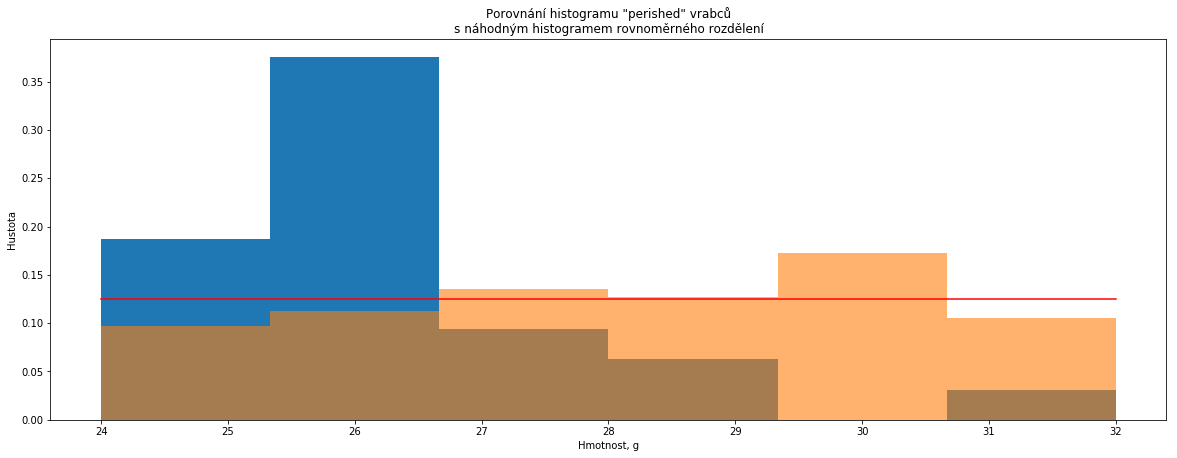

In [14]:
#Porovnání s rovnoměrným rozdělěním
plt.figure(figsize=(20,7))
plt.title('Porovnání histogramu "perished" vrabců\ns náhodným histogramem rovnoměrného rozdělení')
plt.xlabel('Hmotnost, g')
plt.ylabel('Hustota')

#Histogram naších dat
plt.hist(data_perished, bins_perished, density=True)

#Z naších dat odhadujeme parametry rovnoměrného rozdělení
a = round(perished_min) - 1
b = round(perished_max) + 1

#Vygenerujeme si 100 náhodných hodnot z rovnoměrného rozdělění 
#a dáme je do histogramu se stejným počtem přehrádek
random_uniform_values = np.random.uniform(a, b, 100)
plt.hist(random_uniform_values, bins_perished, alpha=0.6, density=True)

#A ještě si pro přehlednost nakreslíme graf hustoty rovnoměrného rozdělení
plt.plot(ox_interval, uniform.pdf(ox_interval, loc=a, scale=(b - a)), color='r')

plt.show()

Jak vidíme, histogram "perished" vrabců nejlépe odpovídá exponenciálnímu rozdělení. Předpoklad byl splněn.

## Oboustranný 95% konfidenční interval pro střední hodnoty

Použili jsme studentovo rozdělení, protože neznáme teoretický rozptyl.

In [15]:
# survived

t = 2.030
survived_koin_a = (survived_EX - ((t * (survived_var ** 0.5)) / (survived_cnt ** 0.5)))
survived_koin_b = (survived_EX + ((t * (survived_var ** 0.5)) / (survived_cnt ** 0.5)))

# perished

t = 2.064
perished_koin_a = (perished_EX - ((t * (perished_var ** 0.5)) / (perished_cnt ** 0.5)))
perished_koin_b = (perished_EX + ((t * (perished_var ** 0.5)) / (perished_cnt ** 0.5)))

print(f'Oboustranný 95% konfidenční interval pro střední hodnotu survived: [{survived_koin_a:.5}, {survived_koin_b:.5}], EX = {survived_EX:.5}')
print(f'Oboustranný 95% konfidenční interval pro střední hodnotu perished: [{perished_koin_a:.5}, {perished_koin_b:.5}], EX = {perished_EX:.5}')

Oboustranný 95% konfidenční interval pro střední hodnotu survived: [25.037, 25.889], EX = 25.463
Oboustranný 95% konfidenční interval pro střední hodnotu perished: [25.668, 26.882], EX = 26.275


# Test na hladině významnosti 5% hypotézy

$$
H_0: EX = K \quad\quad proti \quad\quad H_a: EX \neq K
$$

K je parametr dne narození, hodnota je 11.

In [16]:
print(f'Pro survived, hodnota K neleží v intervalu [{survived_koin_a:.5}, {survived_koin_b:.5}]')
print(f'Pro perished, hodnota K neleží v intervalu [{perished_koin_a:.5}, {perished_koin_b:.5}]')

Pro survived, hodnota K neleží v intervalu [25.037, 25.889]
Pro perished, hodnota K neleží v intervalu [25.668, 26.882]


Zamítáme tedy hypotézy $H_0$ pro obě skupiny (survived i perished).

## Společný test stejné střední hodnoty

$$
H_0: EX\_perished = EX\_survived \quad\quad proti \quad\quad H_a: EX\_perished \neq EX\_survived
$$


In [17]:
print(f'Rozptyly se nerovnají ({survived_var:.5} != {perished_var:.5})')

s = ((survived_var / survived_cnt) + (perished_var / perished_cnt)) ** 0.5
T = (survived_EX - perished_EX) / s
nd = (s ** 4) / (((1/(survived_cnt-1)) * ((survived_var/survived_cnt) ** 2)) + ((1/(perished_cnt-1)) * ((perished_var/perished_cnt) ** 2)))

print(f's = {s:.5}')
print(f'|T| = {abs(T):.5}')
print(f'nd = {nd:.5}')
print(f'abs(T) > 2.014 = {abs(T) > 2.014}')

print('Jelikož je absolutní hodnota T větší, hypotézu H0 zamítáme.')

Rozptyly se nerovnají (1.5395 != 2.0777)
s = 0.36133
|T| = 2.2477
nd = 44.532
abs(T) > 2.014 = True
Jelikož je absolutní hodnota T větší, hypotézu H0 zamítáme.
